1. Генерация случайных величин
2. Оценка параметра с помощью ОМП численно
3. Построение ДИ

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
plt.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
plt.rcParams['font.size'] = 12
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['figure.figsize'] = (10, 6)

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=22)

# 1. Генерация выборок
## 1.1. Модуль np.random
`np.random.rand` - Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)

In [ ]:
for _ in range(3):
    print(np.random.rand(4).round(3))

[0.204 0.497 0.015 0.068]
[0.488 0.935 0.863 0.976]
[0.552 0.822 0.16  0.191]


Как зафиксировать состояния генератора случайных чисел?

In [ ]:
for _ in range(3):
    # <YOUR_CODE_HERE>
    np.random.seed(43)
    print(np.random.rand(4).round(3))

[0.115 0.609 0.133 0.241]
[0.115 0.609 0.133 0.241]
[0.115 0.609 0.133 0.241]


## 1.2. Нормальное распределение
Как генерировать данные из нормального распределения и из других распределений
https://numpy.org/doc/stable/reference/random/legacy.html#distributions

In [ ]:
mean = 5
std = 2
size = 1000

data = np.random.normal(mean, std, size)
data[:10]

array([6.71614669, 4.17398004, 5.99637717, 9.0203985 , 7.52572309,
       4.12157029, 4.30712421, 5.91063932, 1.66267459, 3.27582901])

#### Построим гистограмму

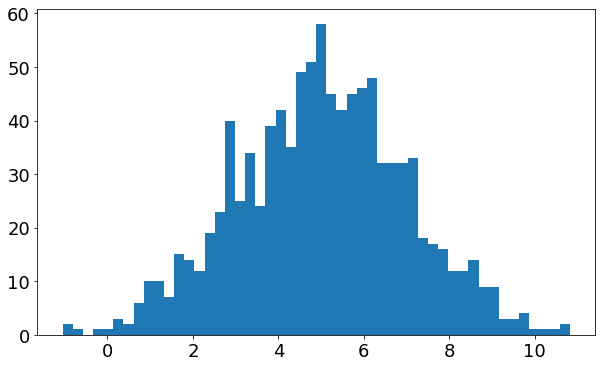

In [ ]:
plt.hist(data, bins=50)
plt.show()

## 1.3. Модуль scipy.stats
`Statistical functions (scipy.stats)` - this module contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

In [ ]:
stats.norm.pdf(5, loc=mean, scale=std)

0.19947114020071635

#### Построим функцию плотности нормального распределения

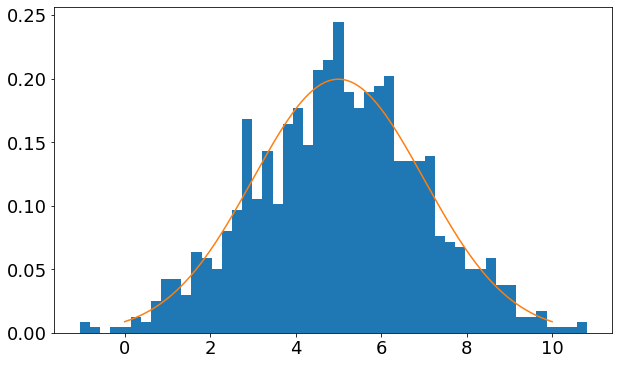

In [ ]:
x = np.linspace(0, 10, 1000)
y = stats.norm.pdf(x, loc=mean, scale=std)
plt.hist(data, bins=50, density=True)
plt.plot(x, y)
plt.show()

## 1.4. Выбор подмножества элементов

In [ ]:
data = [1, 2, 3, 4, 5]

In [ ]:
np.random.choice(data, 4, replace=False)  # без повторений

array([5, 2, 3, 4])

#### Генерация двух подвыборок

In [ ]:
a, b = np.random.choice(data, [2,2], replace=False)
a, b

(array([2, 4]), array([3, 1]))

# 2. ОМП для параметра $p$ распределения Бернулли
Сгенерируем выборку из р-ния Бернулли.

In [ ]:
p_real = 0.3
size = 20

data = np.random.binomial(1, p_real, size)
data

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
p_estimation = np.mean(data)
print('Оценка параметра по теоретической формуле:', p_estimation)

Оценка параметра по теоретической формуле: 0.25


Численно оценим максимум функции правдоподобия.

p_max_likelihood = 0.250


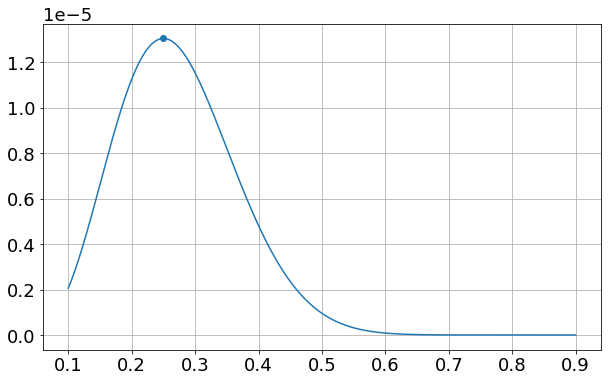

In [ ]:
def get_likelihood(data: np.array, p: float):
    """Вычисляет значение функции правдоподобия р-ния Бернулли.

    data - реализация выборки
    p - параметр р-ния Бренулли
    """
    # <YOUR_CODE_HERE>


array_p = np.linspace(0.1, 0.9, 1000)
likelihoods = [get_likelihood(data, p) for p in array_p]

max_likelihood = np.max(likelihoods)
p_max_likelihood = array_p[likelihoods == max_likelihood][0]
print(f'p_max_likelihood = {p_max_likelihood:0.3f}')

plt.plot(array_p, likelihoods)
plt.scatter([p_max_likelihood], [max_likelihood])
plt.grid()
plt.show()

Оценки параметра $p$ совпали?

# 3. ДИ параметра $p$ р-ния Бернулли

## 3.1. Напишем функцию для построения доверительного интервала.
$$
    \mathbb{P} \left( \overline{X} - c_{\alpha} \sqrt{\frac{\overline{X} (1 - \overline{X})}{n}} \leq p \leq \overline{X} + c_{\alpha} \sqrt{\frac{\overline{X} (1 - \overline{X})}{n}} \right) = 1 - \alpha
$$

Как вычислить $c_{\alpha}$ ?

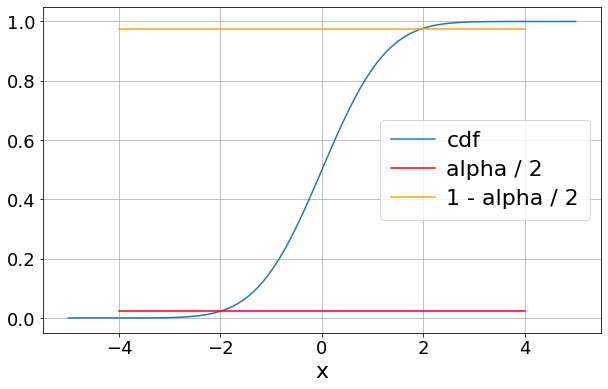

In [ ]:
alpha = 0.05

x = np.linspace(-5, 5, 100)
cdf = stats.norm.cdf(x)

plt.plot(x, cdf, label='cdf')
plt.plot([-4, 4], [alpha / 2] * 2, 'red', label='alpha / 2')
plt.plot([-4, 4], [1 - alpha / 2] * 2, 'orange', label='1 - alpha / 2')

plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()

ppf - Percent point function (inverse of cdf — percentiles), это развернутая куммулятивная функция распределения

Подробнее про `scipy.stats.norm` тут
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
stats.norm.ppf(1 - alpha / 2)

1.959963984540054

In [ ]:
def get_confidence_interval(data: np.array, alpha: float=0.05):
    """Возвращает доверительный интервал."""
    # <YOUR_CODE_HERE>


Проверим что функция выдаёт верный результат на одном тесте в следующей ячейке

In [ ]:
EPS = 5

bounds = get_confidence_interval(np.array([0, 0, 1]))
print(f'your bounds = ({bounds[0]:0.6f}, {bounds[1]:0.6f})')
true_bounds = (-0.200101, 0.866768)

np.testing.assert_almost_equal(
    true_bounds, bounds,
    decimal=EPS,
    err_msg=f'Одна из границ отличается более чем на {1 / 10**EPS}'
)
print('Тест пройден!')

your bounds = (-0.200101, 0.866768)
Тест пройден!


## 3.2. Проверим, что ДИ накрывает оцениваемый параметр с вероятность $1-\alpha$.

Зафиксируем параметр $p$. Будем генерировать выборки, строить доверительные интервалы и проверять находится оцениваем параметр в ДИ или нет. Посчитаем долю случаев, когда ДИ не накрыл параметр, она должна быть примерно равна $\alpha$.

In [ ]:
# <YOUR_CODE_HERE>



In [ ]:
np.mean(res)

0.95

## 3.3. Изменение ДИ при увеличении выборки
Посмотрим как меняется ДИ при увеличении размера выборки

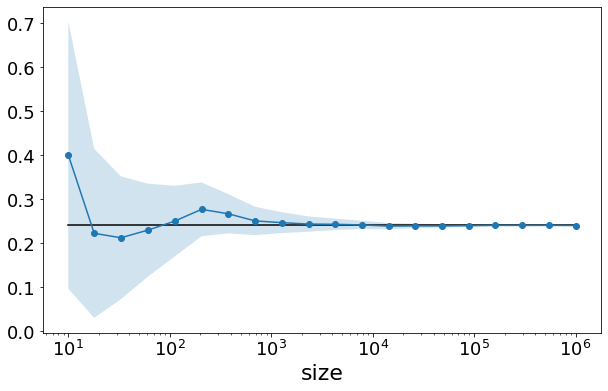

In [ ]:
max_size = 10 ** 6

p = 0.24
data = np.random.binomial(1, p, max_size)

sizes = np.logspace(1, 6, 20).astype(int)
left_bounds = []
right_bounds = []
p_estimations = []
for size in sizes:
    sub_data = data[:size]
    p_estimations.append(sub_data.mean())
    ci = get_confidence_interval(sub_data)
    left_bounds.append(ci[0])
    right_bounds.append(ci[1])

plt.plot([10, max_size], [p, p], 'k', label='p')
plt.plot(sizes, p_estimations, '-o', label='p_est')
plt.fill_between(sizes, left_bounds, right_bounds, alpha=0.2, label='CI')
plt.xscale('log')
plt.xlabel('size')

plt.show()

При повторных запусках доверительные интервалы при малых объёмах данных сильно меняются, но при увеличении размера выборки сходятся к истинному значению параметра.